### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [1]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
import numpy as np

%matplotlib inline


#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [2]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame
whale_navs_df = pd.read_csv(Path("./Resources/whale_navs.csv"), 
                            index_col="date",
                           parse_dates=True,
                           infer_datetime_format=True)
whale_navs_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [3]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.

daily_returns_df = whale_navs_df.pct_change().dropna()
daily_returns_df.head()
daily_returns_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,-0.001079,0.005050,-0.000653,-0.003985,-0.008165
2020-09-08,-0.001737,-0.001888,-0.001270,-0.005019,-0.027323
2020-09-09,0.001115,0.002123,0.002701,0.001817,0.019747
2020-09-10,-0.001258,0.001389,-0.001591,-0.002398,-0.017364
2020-09-11,-0.000418,-0.001930,-0.000434,-0.001016,0.000509


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

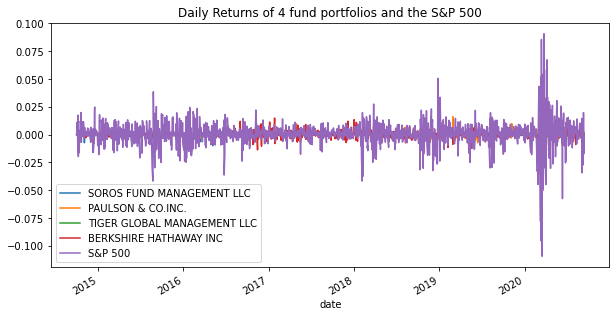

In [6]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size

ax = daily_returns_df.plot(figsize=(10,5), 
                           title="Daily Returns of 4 fund portfolios and the S&P 500")


#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [8]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame

cumulative_returns_df = (1 + daily_returns_df).cumprod() 
cumulative_returns_df.tail()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

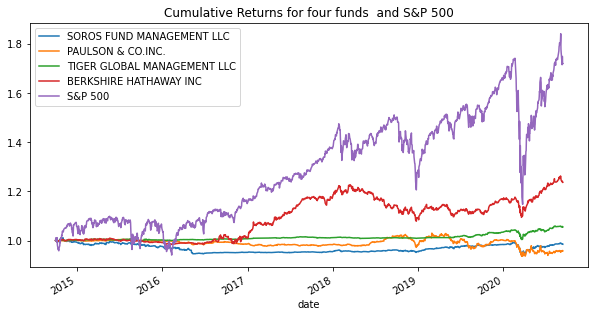

In [11]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
ax = cumulative_returns_df.plot(figsize=(10,5), 
                                title="Cumulative Returns for four funds  and S&P 500")


#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** # The plot shows that none of four fund portfolios outperform the S&P 500 Index.

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Returns of Four Funds and S&P 500 '}>

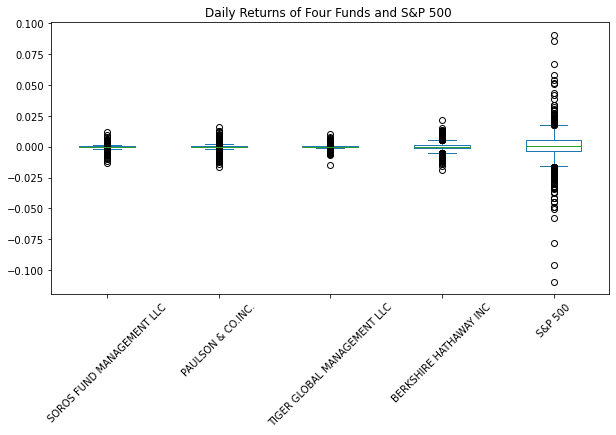

In [13]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size

daily_returns_df.plot(kind="box", figsize=(10,5),title="Daily Returns of Four Funds and S&P 500 ", rot=45)


#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Returns for only Four Funds'}>

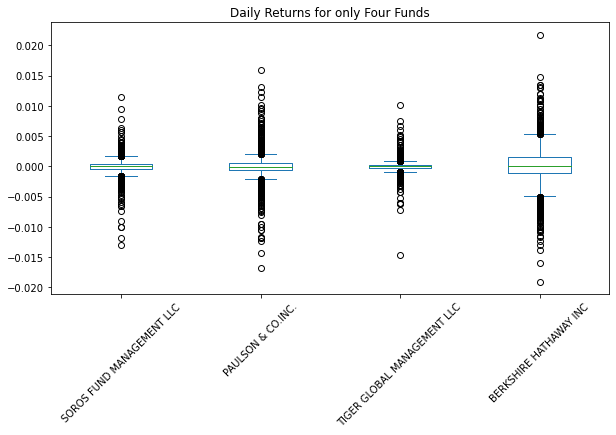

In [15]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size

four_fund_daily_returns_df = daily_returns_df.drop(columns =[ "S&P 500"])

four_fund_daily_returns_df.plot(kind="box", figsize=(10,5), title="Daily Returns for only Four Funds", rot=45)

#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** # Based on the box plot visualization of just the four fund portfolios, the BERKSHIRE HATHAWAY INC was the most volatile and TIGER GLOBAL MANAGEMENT LLC was least volatile.

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [16]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
whale_navs_std = whale_navs_df.std()
whale_navs_std.sort_values()

PAULSON & CO.INC.               0.240011
SOROS FUND MANAGEMENT LLC       0.485997
TIGER GLOBAL MANAGEMENT LLC     0.751144
BERKSHIRE HATHAWAY INC          4.185067
S&P 500                        41.005779
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [17]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
annualized_std = whale_navs_std * np.sqrt(252)

annualized_std.sort_values()

PAULSON & CO.INC.                3.810063
SOROS FUND MANAGEMENT LLC        7.714968
TIGER GLOBAL MANAGEMENT LLC     11.924046
BERKSHIRE HATHAWAY INC          66.435883
S&P 500                        650.946561
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'21-day rolling standard deviation of the four funds and the S&P 500'}, xlabel='date'>

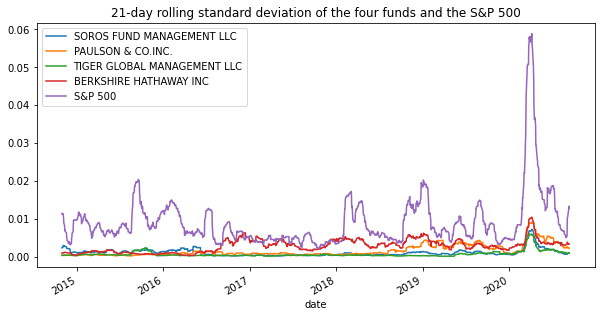

In [18]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size

daily_returns_df.rolling(window=21).std().plot(figsize=(10,5), 
                                               title="21-day rolling standard deviation of the four funds and the S&P 500"
                                              )
                                               
                                               

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'21-day rolling standard deviations of only the four fund'}, xlabel='date'>

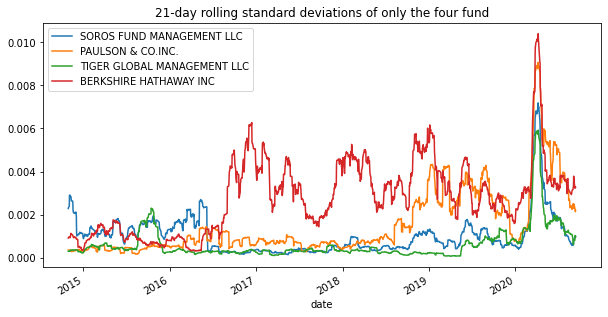

In [20]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
four_fund_daily_returns_df.rolling(window=21).std().plot(figsize=(10,5), 
                                                       title="21-day rolling standard deviations of only the four fund")


#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** # None of the fund portfolios pose more risk than the S&P 500.

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** Yes, the risk of each portfolio increases at the same time that the risk of the S&P 500.

**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** # Based on the rolling standard deviations of only the four fund portfolios, Berkshire Hathway INC poses the most risk. The more risk for Berkshire Hathway INC started from mid 2016 and reached at peak in late 2020. 

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [21]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest

annual_average_return_df = daily_returns_df.mean() * 252

annual_average_return_df.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [22]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest

sharpe_ratios_df = annual_average_return_df / annualized_std
sharpe_ratios_df.sort_values()

PAULSON & CO.INC.             -0.001741
SOROS FUND MANAGEMENT LLC     -0.000296
S&P 500                        0.000166
BERKSHIRE HATHAWAY INC         0.000558
TIGER GLOBAL MANAGEMENT LLC    0.000767
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

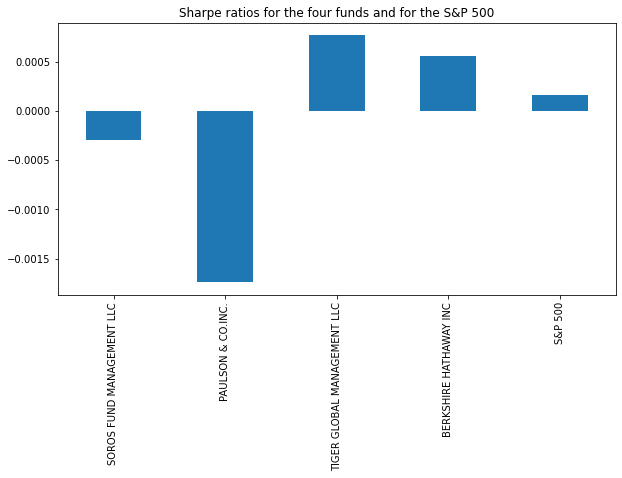

In [25]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
ax=sharpe_ratios_df.plot(kind="bar", figsize=(10,5),
                        title="Sharpe ratios for the four funds and for the S&P 500")


#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** # The TIGER GLOBAL MANAGEMENT LLC offers the best risk-return profile. The PAULSON & CO.INC. offers worst risk-return profile.


---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [26]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
rolling_sp500_variance = daily_returns_df['S&P 500'].rolling(window=60).var()

rolling_sp500_variance.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [27]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data

rolling_tiger_covariance = daily_returns_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(daily_returns_df['S&P 500'])
rolling_tiger_covariance.dropna().tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [28]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information

rolling_tiger_beta = rolling_tiger_covariance / rolling_sp500_variance
rolling_tiger_beta.dropna().tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [29]:
# Calculate the average of the 60-day rolling beta
avg_rolling_tiger_beta = rolling_tiger_beta.mean()
avg_rolling_tiger_beta

0.03093001487238774

##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'TIGER GLOBAL MANAGEMENT LLC 60-day Rolling beta'}, xlabel='date'>

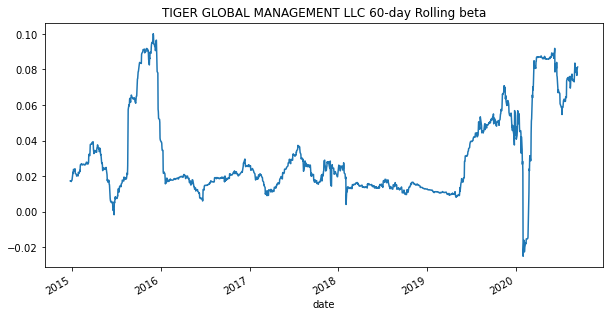

In [30]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size

rolling_tiger_beta.plot(figsize=(10,5), title="TIGER GLOBAL MANAGEMENT LLC 60-day Rolling beta")


##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [31]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data

rolling_berkshire_covariance = daily_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(daily_returns_df['S&P 500'])
rolling_berkshire_covariance.dropna().tail()


date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [32]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
rolling_berkshire_beta = rolling_berkshire_covariance / rolling_sp500_variance

rolling_berkshire_beta.dropna().tail()


date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [33]:
# Calculate the average of the 60-day rolling beta

avg_rolling_berkshire_beta = rolling_berkshire_beta.mean()
avg_rolling_berkshire_beta

0.2214986101354593

##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC 60-day rolling beta'}, xlabel='date'>

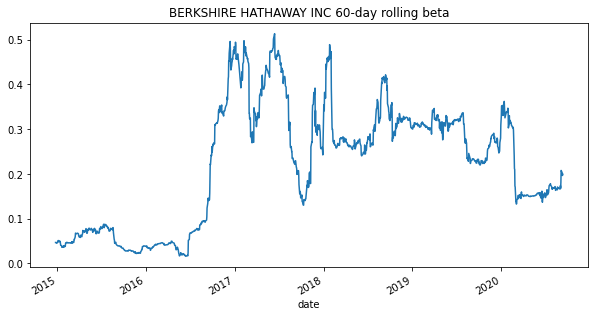

In [34]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size

rolling_berkshire_beta.plot(figsize=(10,5), title="BERKSHIRE HATHAWAY INC 60-day rolling beta")


The avg beta for 'BERKSHIRE HATHAWAY INC' is 0.2214986101354593 
The avg beta for 'TIGER GLOBAL MANAGEMENT' is 0.03093001487238774 


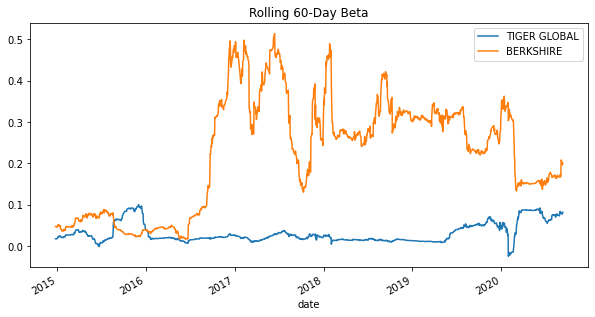

In [36]:
print(f"The avg beta for 'BERKSHIRE HATHAWAY INC' is {avg_rolling_berkshire_beta} ")
print(f"The avg beta for 'TIGER GLOBAL MANAGEMENT' is {avg_rolling_tiger_beta} ")

ax = rolling_tiger_beta.plot(figsize=(10, 5), title='Rolling 60-Day Beta')
rolling_berkshire_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["TIGER GLOBAL", "BERKSHIRE"])

#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # The BERKSHIRE HATHAWAY INC seems more sensitive to movements in the S&P 500


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # I would recommend BERKSHIRE HATHAWAY INC , beacuse it's avg beta value is 0.2214, which is more than the avg beta value of TIGER GLOBAL MANAGEMENT.

---